## Dynamic graph Plotting

### Import Libraries

In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact

Let's plot a random graph of N nodes, edges linked randomly, with random edges.

In [2]:
N = 20
graph = nx.Graph()
for node in range(0,N):
    graph.add_edge(node, random.randint(0,N), weight=random.randint(10,20))
    if node != N:
        graph.add_edge(node, node+1, weight=random.randint(10,20))

In [3]:
pos = nx.fruchterman_reingold_layout(graph)

In [4]:
graph2 = nx.Graph()
graph2.add_nodes_from(graph.nodes())
for u,v in graph.edges():
    graph2.add_edge(u,v, weight=1)

Let's create the list of weights used to modify the width of our edges

In [5]:
weights=nx.get_edge_attributes(graph,'weight')
weight_list = list(weights.values())
weights2=nx.get_edge_attributes(graph2,'weight')
weight_list2 = list(weights2.values())
edge_color = [x/5 for x in weight_list]
edge_color2 =[x/5 for x in weight_list2]

We plot here a random graph with random weights. This is our starter graph.

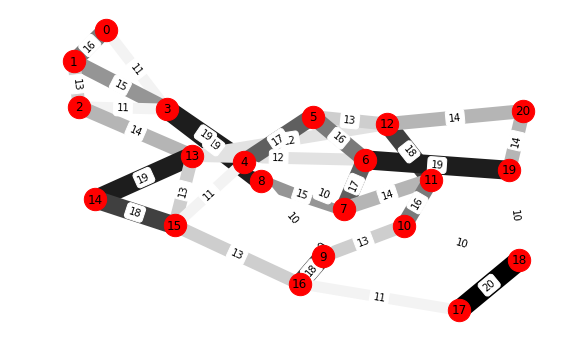

In [6]:
plt.figure(figsize=(20,20))
plt.subplot(321)
nx.draw(graph , pos = pos, width = weight_list , with_labels=True, node_size=500, edge_color=edge_color, edge_cmap= plt.cm.Greys)
nx.draw_networkx_edge_labels(graph,pos = pos,edge_labels=weights)
plt.show()

And for this one, this is the last graph we want to obtain.

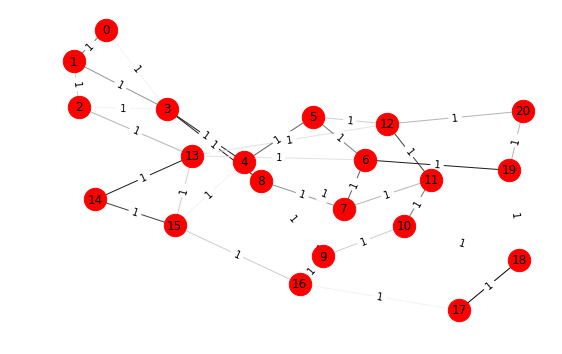

In [7]:
plt.figure(figsize=(20,20))
plt.subplot(322)
nx.draw(graph2 , pos = pos, width = weight_list2 , with_labels=True, node_size=500, edge_labels= weight_list2, edge_color=edge_color, edge_cmap= plt.cm.Greys)
nx.draw_networkx_edge_labels(graph,pos = pos,edge_labels=weights2)
plt.show()

This method computes the linear affine combination between the starter graph and the last graph. The method plots the new graph such that it respects the following equation:
- (1-t)*G1 + t*G2, with t from [0,1]

It returns a list of different linear affine combination, with respect to the variable t.

In [8]:
def comb_graph(g1, g2):
    graphs_list = []
    ranger = [x * 0.1 for x in range(1, 11)]
    for t in ranger:
        g = nx.Graph()
        for u in g1.edges(data = True):
            for v in g2.edges(data = True):
                if u[:-1] == v[:-1]:
                    weighty = int((1-t)*(u[2].get('weight')) + (t+0.1)*(v[2].get('weight')))
                    g.add_edge(u[0], u[1], weight = weighty)
        graphs_list.append(g)
    return graphs_list

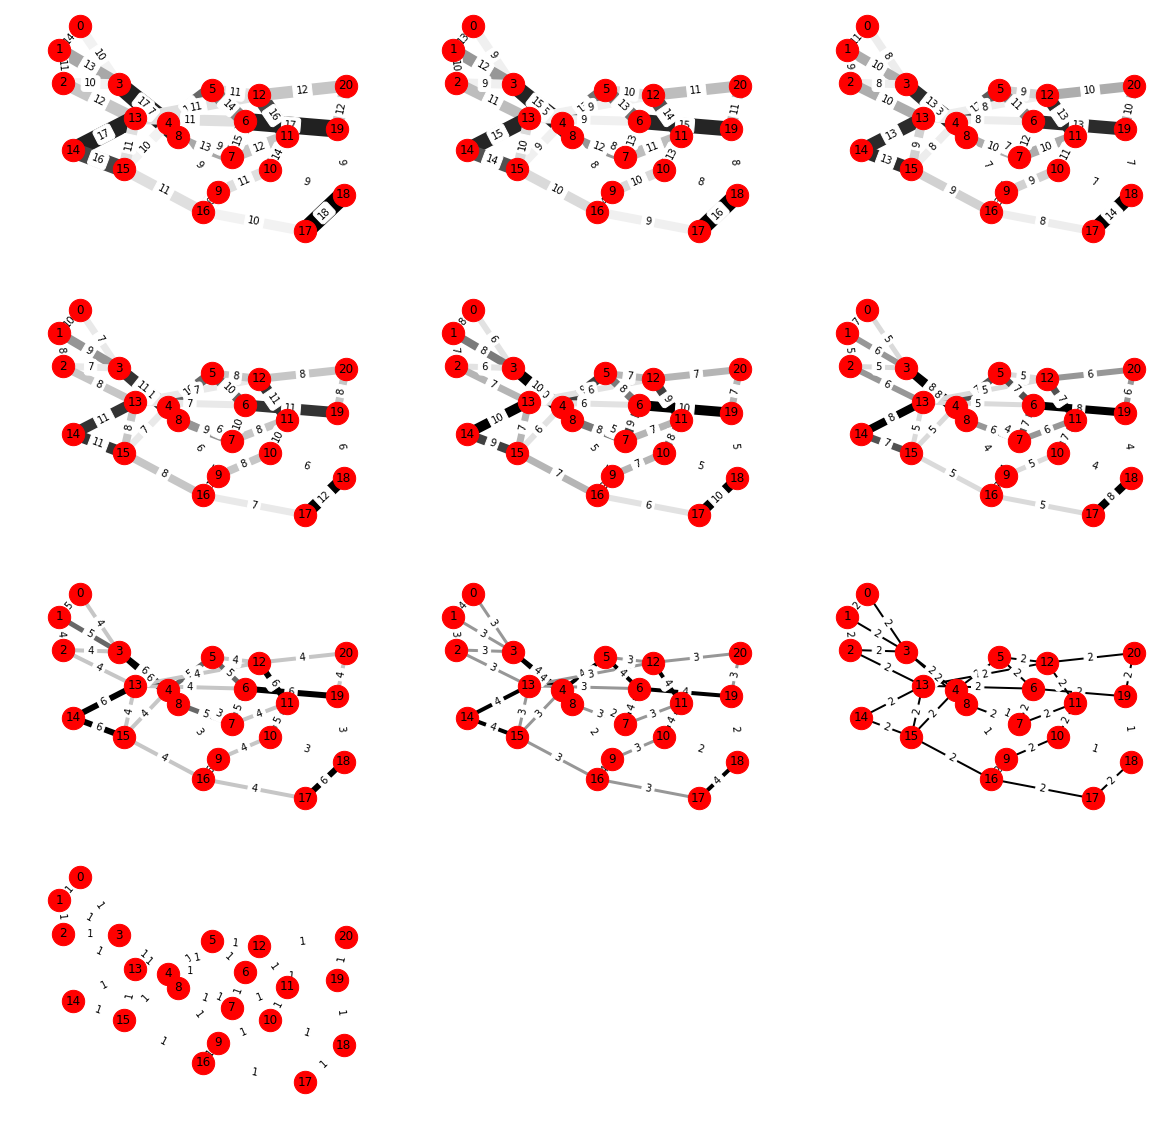

In [9]:
a = comb_graph(graph, graph2)
fig = plt.figure(figsize=(20,20))
for i in range(0, len(a)):
    weights = nx.get_edge_attributes(a[i],'weight')
    weight_list = list(weights.values())
    edge_color = [x/5 for x in weight_list]
    fig.add_subplot(4,3, i+1)
    nx.draw(a[i] , pos = pos, width = weight_list , with_labels=True, node_size=500, edge_color=edge_color, edge_cmap= plt.cm.Greys)
    nx.draw_networkx_edge_labels(a[i],pos = pos,edge_labels=weights)

Now, because we don't really see how the edge weights evolve, let's compute it in a way we can interact with it. Thus, we are able to choose the value of the variable t.

In [10]:
@interact(t=(0,1,0.1))
def plotgraph(t):
    g = nx.Graph()
    for u in graph.edges(data = True):
        for v in graph2.edges(data = True):
            if u[:-1] == v[:-1]:
                weighty = int((1-t)*(u[2].get('weight')) + t*(v[2].get('weight')))
                g.add_edge(u[0], u[1], weight = weighty)
    weights = nx.get_edge_attributes(g,'weight')
    weight_list = list(weights.values())
    edge_color = [x/5 for x in weight_list]
    nx.draw(g , pos = pos, width = weight_list , with_labels=True, node_size=500, edge_color=edge_color, edge_cmap= plt.cm.Greys)
    nx.draw_networkx_edge_labels(g,pos = pos,edge_labels=weights)

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0), Output()), _dom_classes=('widget-inter…